# Modelo que predice si una persona sobrevivio al titanic
Utilizando arbol de decision
- ## Fase de obtencion y procesamiento de datos

In [1]:
import pandas as pd

datos = pd.read_csv("U4_04_train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='count'>

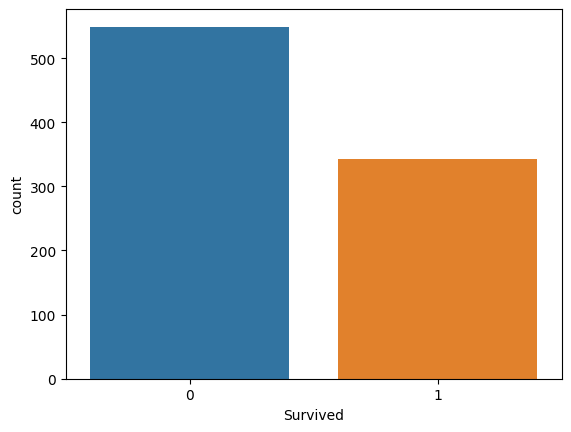

In [4]:
import seaborn as sb

sb.countplot(x='Survived', data=datos)

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='Survived', ylabel='count'>

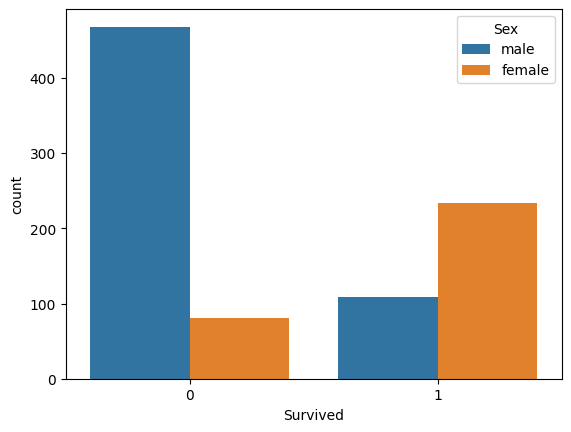

In [5]:
sb.countplot(x='Survived', data=datos, hue='Sex')

In [6]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alain/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


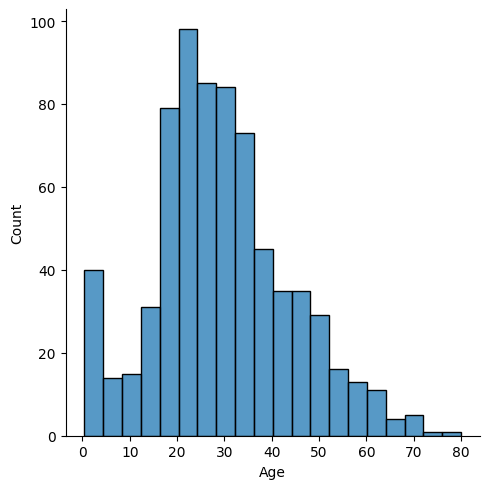

In [7]:
sb.displot(x='Age', data=datos)

In [8]:
datos['Age'].mean()

29.69911764705882

In [9]:
datos['Age'].fillna(datos['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
# Completamos las edades no cargadas con el promedio
datos['Age'] = datos['Age'].fillna(datos['Age'].mean())

In [11]:
# Quitamos la columna cabin ya que no aporta informacion significativa y ademas tiene muchos null
datos = datos.drop(['Cabin'], axis=1)

In [12]:
datos['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
# Borramos los registros con embarked null
datos = datos.dropna()

In [14]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Quitamos las columnas irrelevantes para el modelo
datos = datos.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [16]:
# Convertimos los valores de las columnas male y female a numeros
pd.get_dummies(datos['Sex'], dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [17]:
# Para evitar el 'multicollinearity' (redundancia entre categorias) quitamos una columna ya que si no es mujer es hombre
pd.get_dummies(datos['Sex'], dtype=int, drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [18]:
# Agregamos esta nueva columna a nuestro dataFrame
datos = datos.join(pd.get_dummies(datos['Sex'], dtype=int, drop_first=True))
datos = datos.drop(['Sex'], axis=1)

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='Survived', ylabel='count'>

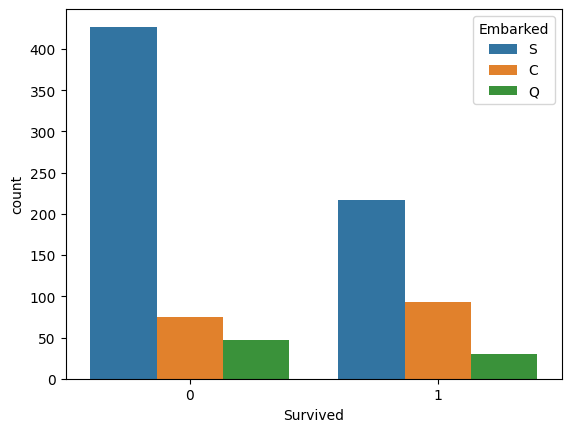

In [19]:
sb.countplot(x='Survived', data=datos, hue='Embarked')

In [20]:
# Evitamos el 'multicollinearity' y los agreamos en el dataFrame
datos = datos.join(pd.get_dummies(datos['Embarked'], dtype=int, drop_first=True))
datos = datos.drop(['Embarked'], axis=1)

In [21]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

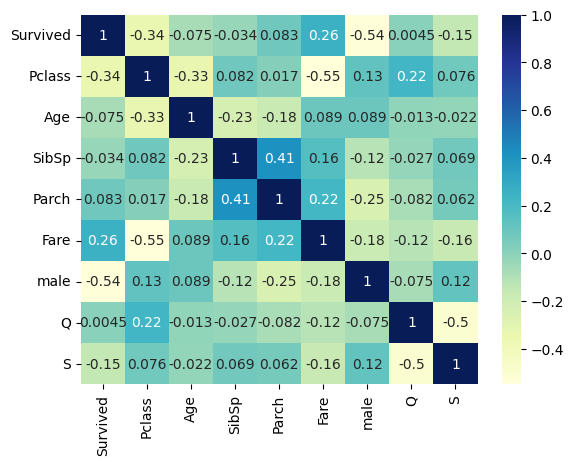

In [22]:
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

<Axes: xlabel='Survived', ylabel='count'>

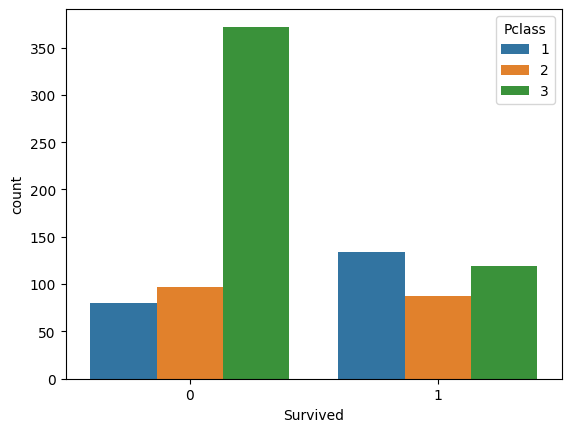

In [23]:
sb.countplot(x="Survived", data=datos, hue='Pclass')

- ## Entrenamiento

In [24]:
# Sacamos las caracteristicas y las guardamos en x
x = datos.drop(['Survived'], axis=1)
# Sacamos la etiqueta y la guardamos en y
y = datos['Survived']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [46]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='gini', max_depth=10)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [44]:
prediccion = modelo.predict(x_test)

In [47]:
from sklearn.base import accuracy_score

accuracy_score(y_test, prediccion)

0.7640449438202247

In [76]:
# Podemos definir muchos modelos de arboles de decision y elegir el que posee mayor precision

resultados = []
max_precision = 0

for i in range(1, 100):
    for criterio in ['gini', 'entropy', 'log_loss']:
        modelo = DecisionTreeClassifier(max_depth=i, criterion=criterio)
        modelo.fit(x_train, y_train)
        predicc = modelo.predict(x_test)
        precision = accuracy_score(y_test, predicc)
        if precision > max_precision:
            max_precision = precision
            best_criterion = criterio
            best_deep = i
        #print(f'Criterio: {criterio}, profundidad: {i}, precision: {precision}')
        resultados.append(precision)
print(f'El mejor arbol de decision en: \nCriterio: {best_criterion}, profundidad: {i}, precision: {max_precision}')

El mejor arbol de decision en: 
Criterio: entropy, profundidad: 99, precision: 0.8651685393258427


/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alain/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: >

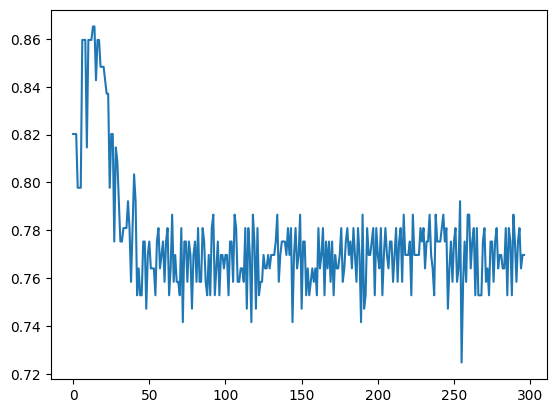

In [77]:
sb.lineplot(data=resultados) # graficar la precision de los arboles

In [78]:
# Usamos el mejor arbol
modelo = DecisionTreeClassifier(max_depth=best_deep, criterion=best_criterion)
modelo.fit(x_train, y_train)
prediccion = modelo.predict(x_test)
exactitud = accuracy_score(y_test, prediccion)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89       109
           1       0.88      0.75      0.81        69

    accuracy                           0.87       178
   macro avg       0.87      0.84      0.85       178
weighted avg       0.87      0.87      0.86       178



In [83]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, prediccion), columns=['Pred: No', 'Pred: Si'], index=['Real: No', 'Real: Si'])

,Pred: No,Pred: Si
Real: No,102,7
Real: Si,17,52


[Text(0.4756944444444444, 0.9166666666666666, 'male <= 0.5\n0.959\n711\n[440, 271]\nMurio'),
 Text(0.2777777777777778, 0.75, 'Pclass <= 2.5\n0.846\n249\n[68, 181]\nVivio'),
 Text(0.1388888888888889, 0.5833333333333334, 'Fare <= 28.856\n0.328\n133\n[8, 125]\nVivio'),
 Text(0.08333333333333333, 0.4166666666666667, 'Fare <= 28.231\n0.497\n55\n[6, 49]\nVivio'),
 Text(0.05555555555555555, 0.25, 'Age <= 23.5\n0.445\n54\n[5, 49]\nVivio'),
 Text(0.027777777777777776, 0.08333333333333333, '0.0\n11\n[0, 11]\nVivio'),
 Text(0.08333333333333333, 0.08333333333333333, '0.519\n43\n[5, 38]\nVivio'),
 Text(0.1111111111111111, 0.25, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.19444444444444445, 0.4166666666666667, 'Age <= 2.5\n0.172\n78\n[2, 76]\nVivio'),
 Text(0.16666666666666666, 0.25, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.2222222222222222, 0.25, 'Fare <= 149.035\n0.1\n77\n[1, 76]\nVivio'),
 Text(0.19444444444444445, 0.08333333333333333, '0.0\n65\n[0, 65]\nVivio'),
 Text(0.25, 0.08333333333333333, '0.414\n12\n[1, 1

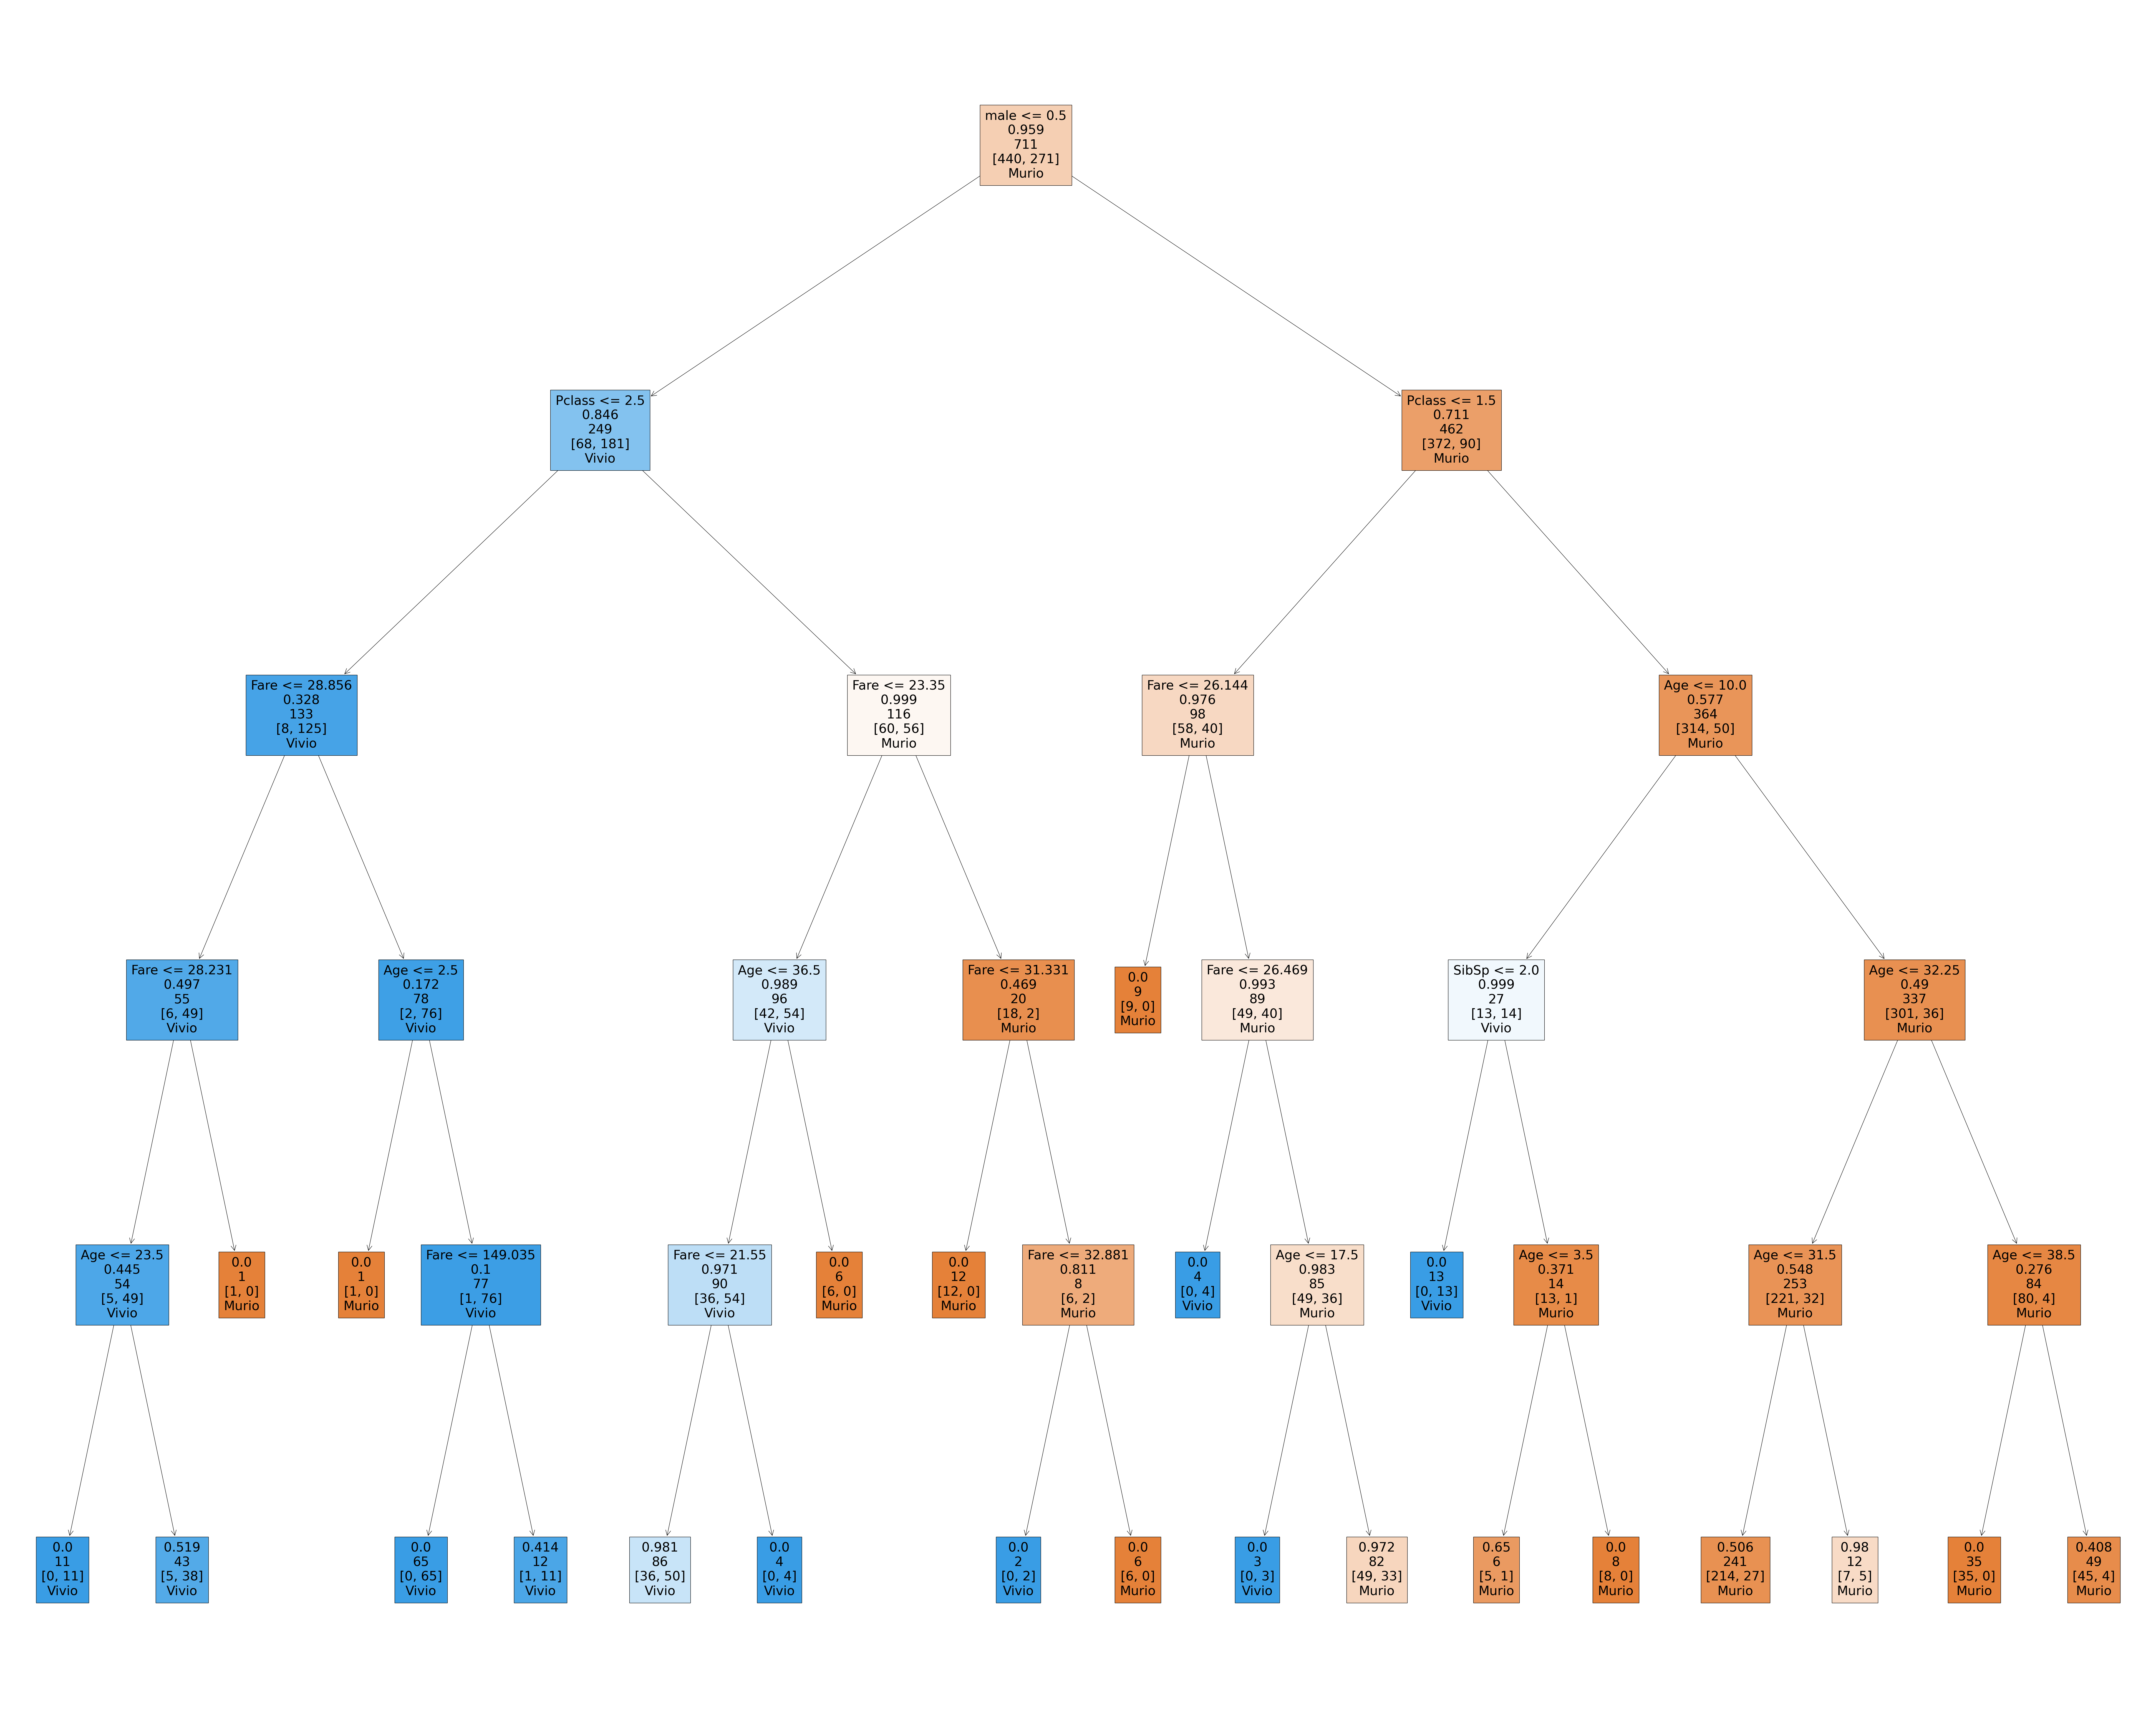

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(modelo, feature_names=list(x_test.columns), class_names=['Murio', 'Vivio'], filled=True, label='none')